In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

### Vote Methodology

In [41]:
# mock answer
DAB=['A','D','A','D','A','D','D','D','D','D',
     'D','A','N','A','D','D','A','N','N','N',
     'D','N','A','N/A','D','A','N','A','A','A']
CP=['D','A','D','A','D','D','N','A','A','A',
    'A','D','N','N','D','D','D','N','A','A',
    'D','A','D','D','D','N','D','D','D','D']
LP=['A','N','D','D','D','N/A','N','N','A','N',
    'D','A','A','D','A','A','A','D','D','D',
    'A','D','A','A','A','D','A','N','A','D']
IND=['N','A','D','N','N/A','N','D','D','A','N',
     'N','A','A','N','N','N','D','A','N','A',
     'N','A','D','D','D','A','D','N/A','D','A']

opinions = {"DAB":DAB, "CP":CP, "LP":LP, "IND":IND}

DAB_weight = [3,3,2,1,1,1,3,3,1,1,3,3,2,2,2,2,3,2,2,2,1,2,3,0,2,2,1,3,3,2]
CP_weight = [3,3,3,3,3,2,3,1,2,2,3,3,2,2,2,2,3,2,2,3,3,3,3,3,2,1,3,3,3,3]
LP_weight = [1,3,1,1,3,0,3,3,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,1]
IND_weight = [1,3,1,1,0,1,3,1,1,1,1,2,3,2,1,2,1,1,2,1,2,3,2,2,3,3,3,0,3,3]

party_weights = {"DAB":DAB_weight, "CP":CP_weight, "LP":LP_weight, "IND":IND_weight}

colors_party = {"DAB":"blue", "CP":"purple", "LP":"green", "IND":"red", "you":"grey"}

In [229]:
Score = {"A":1, "D":-1, "N":0, "N/A":0}
Economy_question = range(1,11)+[30]
Social_question = range(12,29)
Weight = {"highly important":3, "moderate":2, "not important":1}

In [230]:
def calculate_position(choices, weight, compute_axis=False):
    eco_weight = [weight[i-1] for i in Economy_question]
    soc_weight = [weight[i-1] for i in Social_question]
    
    position_e = np.average([Score[choices[i-1]] for i in Economy_question] , weights=eco_weight)
    position_s = np.average([Score[choices[i-1]] for i in Social_question] , weights=soc_weight)
    
    if not compute_axis: return position_e, position_s

    axis_e = np.average([(Score[choices[i-1]]-position_e)**2 for i in Economy_question], weights=eco_weight)**.5
    axis_s = np.average([(Score[choices[i-1]]-position_s)**2 for i in Social_question], weights=soc_weight)**.5
    return [position_e, position_s], [axis_e, axis_s]

In [231]:
def plot_you(you, your_weight):
    plt.figure(figsize=[10,10])
    
    for party in ["DAB","CP","LP","IND"]:
        position = calculate_position(opinions[party], party_weights[party])
        plt.scatter(position[0], position[1], color=colors_party[party], s=400, alpha=0.8)
        plt.annotate(party, xy=position,  xycoords='data',
                xytext=(-50, -30), textcoords='offset points',
                bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90"),
                )
        
    position, shadow = calculate_position(you, your_weight, True)
    plt.scatter(position[0], position[1], color=colors_party["you"], s=400, alpha=0.8)
    circle = Ellipse(position, width=shadow[0], height=shadow[1], color = "grey", alpha=0.3)
    plt.gca().add_patch(circle)
    

    #plt.axis('off')
    plt.xlabel("Economic left")
    plt.ylabel("Social conservative")
    
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    
    plt.show()

In [ ]:
def position_bar_plot(you, your_weight):

##An example of two dimentional graph.

Example:
Random generated answer is:
1: N;  2: A;  3: N;  4: N;  5: A;  6: N;  7: N/A;  8: A;  9: N;  10: D;  11: N;  12: D;  13: N;  14: D;  15: A;  16: A;  17: N;  18: A;  19: N;  20: A;  21: D;  22: A;  23: N;  24: A;  25: A;  26: D;  27: N;  28: N;  29: N;  30: A; 

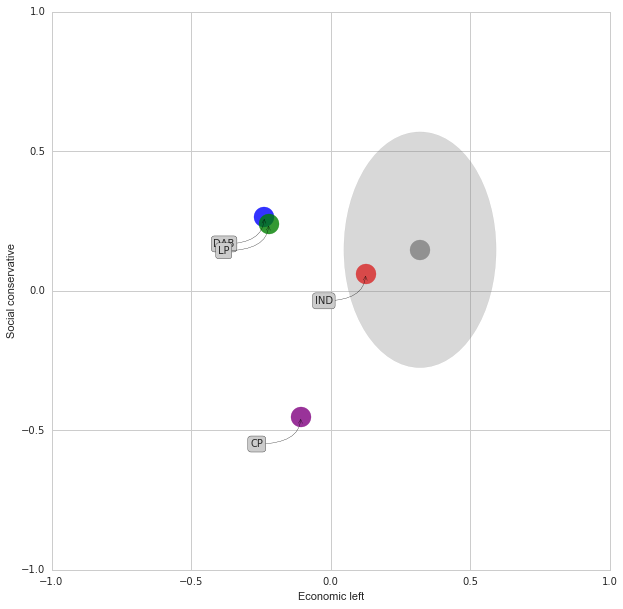

In [232]:
print "Example:"
you = np.random.choice(['A','D','N','N/A'], 30, p=[0.33, 0.33, 0.33, 0.01])
weight_match = {3:"%d: \x1b[31m%s\x1b[0m; ", 2:"%d: \x1b[32m%s\x1b[0m; ", 1:"%d: %s; "}
your_weight = np.random.choice([3,2,1], 30, p=[1./3,1./3,1./3])
print "Random generated answer is:"
for index, value in enumerate(you):
    print weight_match[your_weight[index]]%(index+1, value),
plot_you(you, your_weight)